# Part 3: Logarithmic plots

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from math import radians, cos, sin, asin, sqrt

### Importing the Crime Data

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Logarithmic Plot

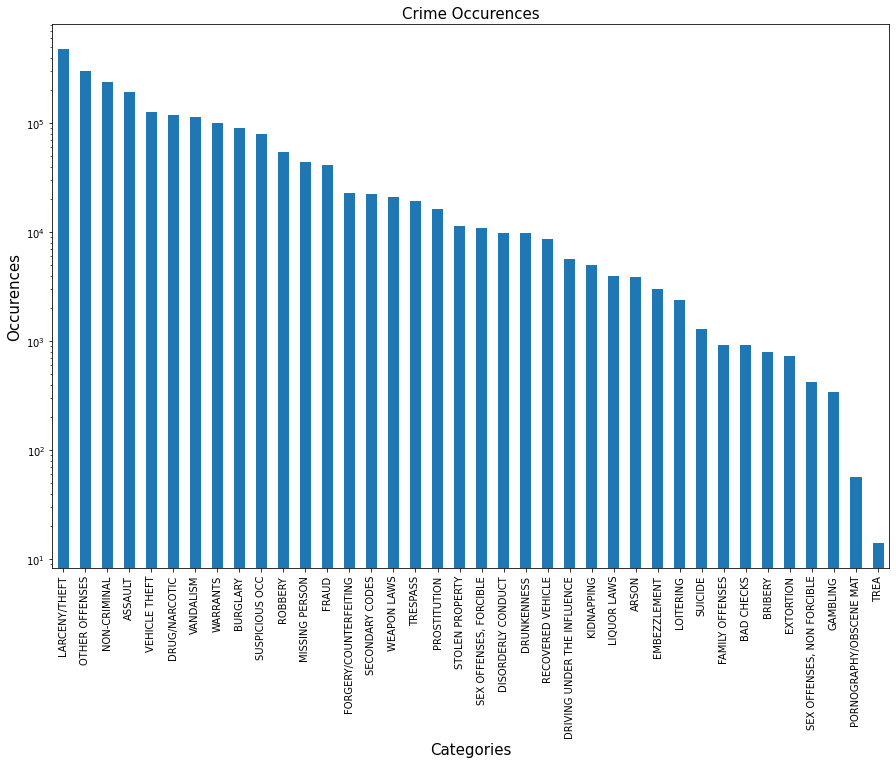

In [3]:
num_cri_cat = data['Category'].value_counts()

col = ['Category', 'Occurences']

cri_occ = pd.DataFrame(num_cri_cat.reset_index())
cri_occ.columns = col

cri_occ.plot(kind='bar', x='Category', y='Occurences', figsize=(15,10), legend=False)

plt.title('Crime Occurences', fontsize=15)
plt.ylabel('Occurences', fontsize=15)
plt.yscale('log')
plt.xlabel('Categories', fontsize=15)

plt.show()

### Haversine Formula

In [4]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

### Remove Outliers (Coordinates) from the Data

In [5]:
data = data[(data['Y'] < 50) & (data['X'] < -122)]

### Estimate the Bins

In [6]:
lat_min = data['Y'].min()
lat_max = data['Y'].max()
lon_min = data['X'].min()
lon_max = data['X'].max()

print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")

print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")

Estimated bin amount along the western border of San Fransisco: 125.36317921721854
Estimated bin amount along the eastern border of San Fransisco: 125.36317921721854
Estimated bin amount along the northern border of San Fransisco: 130.78123566673804
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


### Divide San Francisco into a grid roughly $100m \times 100m$

In [7]:
count, lon, lat = np.histogram2d(data.Y, data.X, bins = [130,125])

### Count the number of thefts occurring within each grid-square 

In [8]:
coordinates = data[['X', 'Y']]

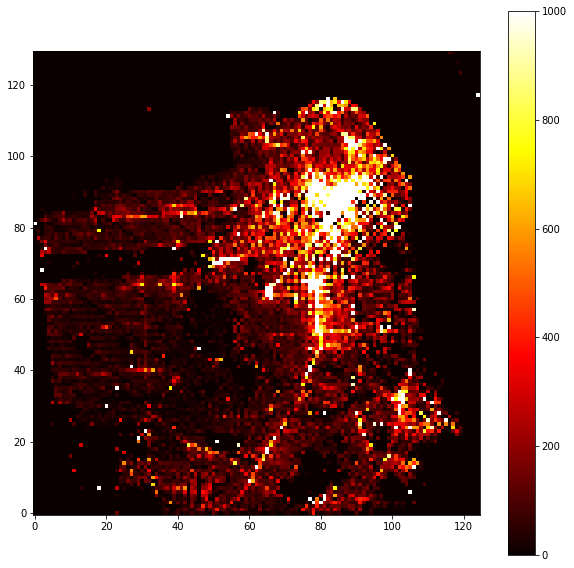

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=1000, origin='lower')
plt.colorbar()

### Create Grid

In [10]:
grid = []
for i in range(130):
    for j in range(125):
        grid.append([lon[i],lat[j]])

grid = pd.DataFrame(grid, columns = ['Lon', 'Lat'])  

### Create Theft Dataframe

In [11]:
theft = data[data['Category']=='LARCENY/THEFT'][['X','Y']].reset_index(drop=True)

### Mapping to Grid

In [12]:
theft['lat_map'] = theft['X'].apply(lambda x: min(lat, key = lambda y: abs(y - x)))
theft['lon_map'] = theft['Y'].apply(lambda x: min(lon, key = lambda y: abs(y - x)))

### Count Theft Crimes

In [13]:
count_theft = theft.groupby(['lat_map', 'lon_map']).size().reset_index()
count_theft.columns = ['Lat', 'Lon', 'Count']

grid['Count'] = pd.merge(grid, count_theft, on=['Lon', 'Lat'], how='left')['Count']
grid['Count'] = grid['Count'].fillna(0)

### Tally Counts

In [14]:
tally_counts = grid['Count'].value_counts().to_frame().reset_index()
tally_counts.columns = ['Count of Thefts', 'Count of Squares']

### Plot the Distribution on Linear Axes.

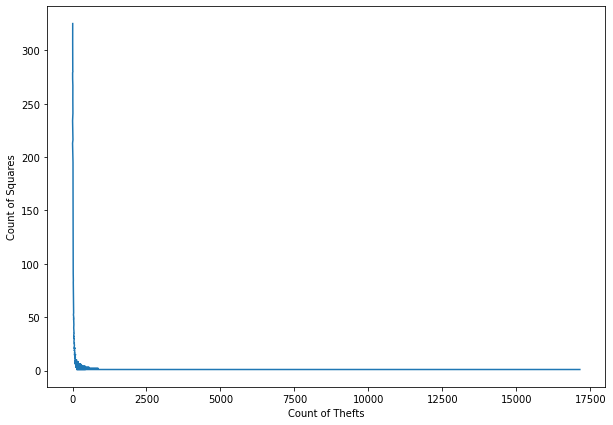

In [15]:
plt.figure(figsize=(10, 7))

plt.plot(tally_counts['Count of Thefts'][1:], tally_counts['Count of Squares'][1:])
plt.xlabel('Count of Thefts', fontsize=10)
plt.ylabel('Count of Squares', fontsize=10)

plt.show()

### Plot the Distribution on loglog Axes.

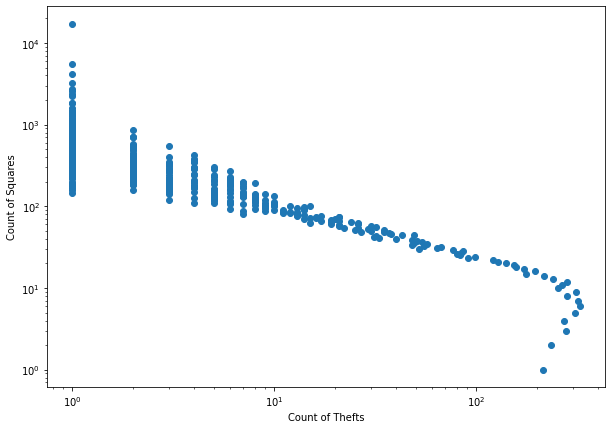

In [16]:
plt.figure(figsize=(10, 7))

plt.scatter(tally_counts['Count of Squares'][1:],tally_counts['Count of Thefts'][1:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Count of Thefts', fontsize=10)
plt.ylabel('Count of Squares', fontsize=10)

plt.show()